In [7]:
import string;
import gensim
from gensim import corpora, models
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer
import nltk

import pyLDAvis
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

# We import sklearn.
import sklearn

import time
import csv

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nolanmccafferty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
docs = []
BGT_jobID = {}

years = ['07','10','11','12','13','14','15','16']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for year in years:
    for month in months:
        filename = month + '-'+'20'+ year+'.txt'
        print(filename)
#         with open(filename) as file:
#             for line in csv.reader(file, dialect="excel-tab"):
#                 if line[0] != '':
#                     BGT_jobID[line[1]] = line[3]
#                     docs.append(line[3])

01-2007.txt
02-2007.txt
03-2007.txt
04-2007.txt
05-2007.txt
06-2007.txt
07-2007.txt
08-2007.txt
09-2007.txt
10-2007.txt
11-2007.txt
12-2007.txt
01-2010.txt
02-2010.txt
03-2010.txt
04-2010.txt
05-2010.txt
06-2010.txt
07-2010.txt
08-2010.txt
09-2010.txt
10-2010.txt
11-2010.txt
12-2010.txt
01-2011.txt
02-2011.txt
03-2011.txt
04-2011.txt
05-2011.txt
06-2011.txt
07-2011.txt
08-2011.txt
09-2011.txt
10-2011.txt
11-2011.txt
12-2011.txt
01-2012.txt
02-2012.txt
03-2012.txt
04-2012.txt
05-2012.txt
06-2012.txt
07-2012.txt
08-2012.txt
09-2012.txt
10-2012.txt
11-2012.txt
12-2012.txt
01-2013.txt
02-2013.txt
03-2013.txt
04-2013.txt
05-2013.txt
06-2013.txt
07-2013.txt
08-2013.txt
09-2013.txt
10-2013.txt
11-2013.txt
12-2013.txt
01-2014.txt
02-2014.txt
03-2014.txt
04-2014.txt
05-2014.txt
06-2014.txt
07-2014.txt
08-2014.txt
09-2014.txt
10-2014.txt
11-2014.txt
12-2014.txt
01-2015.txt
02-2015.txt
03-2015.txt
04-2015.txt
05-2015.txt
06-2015.txt
07-2015.txt
08-2015.txt
09-2015.txt
10-2015.txt
11-2015.txt
12-2

In [7]:
years = ['07','10','11','12','13','14','15','16']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
certifications = []

"""Certifications"""
for year in years:
    for month in months:
        filename = 'Certs Text Files/Certs 20' + year +'/Certs 20' + year + '-'+ month +'.txt'
        print(filename)
        with open(filename) as file:
            for line in csv.reader(file, dialect="excel-tab"):
                if line[0] != 'BGTJobId':
                    # key is BGT Job ID
#                     certifications[line[0]] = line[2]
                    certifications.append(line[3])


Certs Text Files/Certs 2007/Certs 2007-01.txt
Certs Text Files/Certs 2007/Certs 2007-02.txt
Certs Text Files/Certs 2007/Certs 2007-03.txt
Certs Text Files/Certs 2007/Certs 2007-04.txt
Certs Text Files/Certs 2007/Certs 2007-05.txt
Certs Text Files/Certs 2007/Certs 2007-06.txt
Certs Text Files/Certs 2007/Certs 2007-07.txt
Certs Text Files/Certs 2007/Certs 2007-08.txt
Certs Text Files/Certs 2007/Certs 2007-09.txt
Certs Text Files/Certs 2007/Certs 2007-10.txt
Certs Text Files/Certs 2007/Certs 2007-11.txt
Certs Text Files/Certs 2007/Certs 2007-12.txt
Certs Text Files/Certs 2010/Certs 2010-01.txt
Certs Text Files/Certs 2010/Certs 2010-02.txt
Certs Text Files/Certs 2010/Certs 2010-03.txt
Certs Text Files/Certs 2010/Certs 2010-04.txt
Certs Text Files/Certs 2010/Certs 2010-05.txt
Certs Text Files/Certs 2010/Certs 2010-06.txt
Certs Text Files/Certs 2010/Certs 2010-07.txt
Certs Text Files/Certs 2010/Certs 2010-08.txt
Certs Text Files/Certs 2010/Certs 2010-09.txt
Certs Text Files/Certs 2010/Certs 

In [9]:
years = ['07','10','11','12','13','14','15','16']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
cip = []

"""CIP"""
for year in years:
    for month in months:
        filename = 'CIP Text Files/CIP 20' + year +'/CIP 20' + year + '-'+ month +'.txt'
        print(filename)
        with open(filename) as file:
            for line in csv.reader(file, dialect="excel-tab"):
                if line[0] != 'BGTJobId':
                    # key is BGT Job ID
#                     certifications[line[0]] = line[2]
                    cip.append(line[3])


CIP Text Files/CIP 2007/CIP 2007-01.txt
CIP Text Files/CIP 2007/CIP 2007-02.txt
CIP Text Files/CIP 2007/CIP 2007-03.txt
CIP Text Files/CIP 2007/CIP 2007-04.txt
CIP Text Files/CIP 2007/CIP 2007-05.txt
CIP Text Files/CIP 2007/CIP 2007-06.txt
CIP Text Files/CIP 2007/CIP 2007-07.txt
CIP Text Files/CIP 2007/CIP 2007-08.txt
CIP Text Files/CIP 2007/CIP 2007-09.txt
CIP Text Files/CIP 2007/CIP 2007-10.txt
CIP Text Files/CIP 2007/CIP 2007-11.txt
CIP Text Files/CIP 2007/CIP 2007-12.txt
CIP Text Files/CIP 2010/CIP 2010-01.txt
CIP Text Files/CIP 2010/CIP 2010-02.txt
CIP Text Files/CIP 2010/CIP 2010-03.txt
CIP Text Files/CIP 2010/CIP 2010-04.txt
CIP Text Files/CIP 2010/CIP 2010-05.txt
CIP Text Files/CIP 2010/CIP 2010-06.txt
CIP Text Files/CIP 2010/CIP 2010-07.txt
CIP Text Files/CIP 2010/CIP 2010-08.txt
CIP Text Files/CIP 2010/CIP 2010-09.txt
CIP Text Files/CIP 2010/CIP 2010-10.txt
CIP Text Files/CIP 2010/CIP 2010-11.txt
CIP Text Files/CIP 2010/CIP 2010-12.txt
CIP Text Files/CIP 2011/CIP 2011-01.txt


In [14]:
years = ['07','10','11','12','13','14','15','16']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
majors = []

"""Std Major"""
for year in years:
    for month in months:
        filename = 'StdMajor Text Files/StdMajor 20' + year +'/StdMajor 20' + year + '-'+ month +'.txt'
        print(filename)
        with open(filename) as file:
            for line in csv.reader(file, dialect="excel-tab"):
                if line[0] != 'BGTJobId':
                    # key is BGT Job ID
#                     certifications[line[0]] = line[2]
                    majors.append(line[3])


StdMajor Text Files/StdMajor 2007/StdMajor 2007-01.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-02.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-03.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-04.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-05.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-06.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-07.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-08.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-09.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-10.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-11.txt
StdMajor Text Files/StdMajor 2007/StdMajor 2007-12.txt
StdMajor Text Files/StdMajor 2010/StdMajor 2010-01.txt
StdMajor Text Files/StdMajor 2010/StdMajor 2010-02.txt
StdMajor Text Files/StdMajor 2010/StdMajor 2010-03.txt
StdMajor Text Files/StdMajor 2010/StdMajor 2010-04.txt
StdMajor Text Files/StdMajor 2010/StdMajor 2010-05.txt
StdMajor Text Files/StdMajor 2010/StdMajor 2010-06.txt
StdMajor T

In [8]:
def uniquify(seq, idfun=None): 
   # order preserving
   if idfun is None:
       def idfun(x): return x
   seen = {}
   result = []
   for item in seq:
       marker = idfun(item)
       if marker in seen: continue
       seen[marker] = 1
       result.append(item)
   return result

In [10]:
from datetime import timedelta, date

years = [7,10,11,12,13,14,15,16]


def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)


dates = {}        
for year in years:
    days = []
    year = year + 2000
    start = date(year, 1, 1)
    end = date(year, 12, 31)
    for dt in daterange(start, end):
        days.append(dt.strftime("%m-%d-%Y"))
    dates[year] = days

In [ ]:
docs = []
years = [2007,2010,2011,2012,2013,2014,2015,2016]
yearly_docs = {}
BGT_jobID = {}

for year in years:
    for date in dates[year]:
            date_docs = []
            print(date)
            filename = '../text_data/JobText_US_' + date + '.txt'
            with open(filename) as file:
                i = 0
                nums = [random.randint(1,10000) for a in range(5)]
                for line in csv.reader(file, dialect="excel-tab"):
                    if line[0] != '':
                        i += 1
                        if i in nums:
                            BGT_jobID[line[1]] = line[3]
                            docs.append(line[3])
#                         BGT_jobID[line[1]] = line[3]
#                         date_docs.append(line[3])
#             date_docs = uniquify(date_docs)
#             docs.append(date_docs)
#             documents = []
            
#     for day in docs:
#         for job in day:
#             documents.append(job)
#             documents = uniquify(documents)
#     print(len(documents))
#     with open('../text_data/'+str(year)+'_unique.txt', 'w') as wf:
#         for job in documents:
#             wf.write(job)
#             wf.write('zzz/n')
#     del documents
#     gc.collect()

In [13]:
docs = []
with open('text.txt') as file:
    for line in csv.reader(file, dialect="excel-tab"):
        if line[0] != '':
            docs.append(line[3])
            
print(len(docs))
print(len(uniquify(docs)))
print(len(docs) - len(uniquify(docs)))

145081
144662
419


In [15]:
d = uniquify(docs)
for i in d[:5]:
    print(i)
    print(' ')

Tuesday, February 02, 2010  800-544-7255  info@medicalexpress.com QUICK LINKS  : |  |  |  Search our Travel Nurse Jobs  Where would you like to work? Whether you're looking to stay in your local area or head to the beaches, the mountains, the desert or the nation's biggest cities, our powerful database of travel nurse jobs will help you explore the many options that are available in your field. Simply enter your search criteria in the fields below to get started.  Medical Express assignments fill quickly! To get the most up-to-date information on available jobs, or if your discipline or specialty is not listed below, call us at (800) 544-7255 or  contact us online. And don't forget to check our  FAQs page for details on travel experience requirements.  You searched for:  Discipline Certified Dialysis Technician Specialty Pediatric Location New York Search results Listed below is a summary of the travel assignments that are available in your specialty. To get specific details about thes

In [3]:
# stop words
en_stop = get_stop_words('en')

In [4]:
# stemmer
p_stemmer = PorterStemmer()

In [7]:
docs = docs[:5000]
len(docs)

5000

In [8]:
documents = []

for i in docs:
    # tokenize text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = [x.lower() for x in tokenizer.tokenize(i)]
    
    # remove stop words, numbers, and short words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop and len(i) > 3 and not i.isdigit()]
    
    # stem and lemmatize tokens
    stemmed_tokens = [p_stemmer.stem(WordNetLemmatizer().lemmatize(i, pos='v')) for i in stopped_tokens]
    
    # add tokens to list
    documents.append(stemmed_tokens)

In [10]:
documents[1]

['tuesday',
 'februari',
 'info',
 'medicalexpress',
 'quick',
 'link',
 'search',
 'travel',
 'nurs',
 'job',
 'like',
 'work',
 'whether',
 'look',
 'stay',
 'local',
 'area',
 'head',
 'beach',
 'mountain',
 'desert',
 'nation',
 'biggest',
 'citi',
 'power',
 'databas',
 'travel',
 'nurs',
 'job',
 'will',
 'help',
 'explor',
 'mani',
 'option',
 'avail',
 'field',
 'simpli',
 'enter',
 'search',
 'criteria',
 'field',
 'start',
 'medic',
 'express',
 'assign',
 'fill',
 'quickli',
 'date',
 'inform',
 'avail',
 'job',
 'disciplin',
 'specialti',
 'list',
 'call',
 'contact',
 'onlin',
 'forget',
 'check',
 'faq',
 'page',
 'detail',
 'travel',
 'experi',
 'requir',
 'search',
 'disciplin',
 'certifi',
 'dialysi',
 'technician',
 'specialti',
 'pediatr',
 'locat',
 'california',
 'search',
 'result',
 'list',
 'summari',
 'travel',
 'assign',
 'avail',
 'specialti',
 'specif',
 'detail',
 'job',
 'pleas',
 'receiv',
 'applic',
 'recruit',
 'will',
 'work',
 'find',
 'assign',
 'sui

In [8]:
# turn tokenize documents into a id - term dictionary
dictionary = corpora.Dictionary(documents)

len(dictionary)

118607

In [9]:
# filter out words that are too frequent or too infrequent
dictionary.filter_extremes(no_below=0.02, no_above=0.5, keep_n=100000)

len(dictionary)

100000

In [10]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(document) for document in documents]

In [50]:
# creating object for LDA model
Lda = gensim.models.ldamodel.LdaModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus, num_topics=num_topics, id2word=dictionary, passes=20)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics)

    return model_list, coherence_values

In [51]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=10, limit=51, step=5)

10
15
20
25
30
35
40
45
50


In [52]:
# Can take a long time to run, second half
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=documents, start=55, limit=76, step=5)

55
60
65
70
75


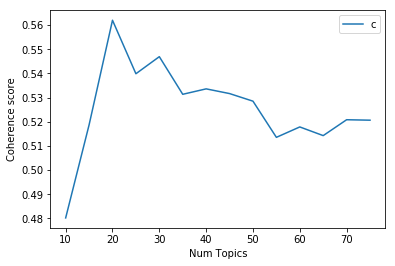

In [53]:
# Show graph
limit=76; start=10; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values + coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# Print the coherence scores
for m, cv in zip(x, coherence_values + coherence_values_2):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.4802
Num Topics = 15  has Coherence Value of 0.5187
Num Topics = 20  has Coherence Value of 0.562
Num Topics = 25  has Coherence Value of 0.5399
Num Topics = 30  has Coherence Value of 0.5469
Num Topics = 35  has Coherence Value of 0.5314
Num Topics = 40  has Coherence Value of 0.5336
Num Topics = 45  has Coherence Value of 0.5317
Num Topics = 50  has Coherence Value of 0.5285
Num Topics = 55  has Coherence Value of 0.5135
Num Topics = 60  has Coherence Value of 0.5179
Num Topics = 65  has Coherence Value of 0.5143
Num Topics = 70  has Coherence Value of 0.5208
Num Topics = 75  has Coherence Value of 0.5206


In [89]:
# choose the model with the highest Conherence value 
# num_topics = 20
optimal_model = model_list[2]

# Visualize the topics
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary, mds="tsne")

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -149.208878   73.185646       1        1  10.230050
8       28.337679  -38.671143       2        1   8.789695
14     -94.957825 -112.130035       3        1   8.680138
13     -29.267561    3.624675       4        1   8.217331
11      38.390865   21.533932       5        1   6.510316
12     -27.156979  -69.313141       6        1   6.078314
6      -82.654869  -39.540134       7        1   5.380768
10      42.453918  129.698517       8        1   5.056204
18    -150.148590  -67.940117       9        1   4.819673
19     -30.481056  138.252106      10        1   4.716941
15      35.672329 -113.853264      11        1   4.702721
0       94.682693  -70.434265      12        1   4.356172
16     106.503044    0.604154      13        1   4.020772
9      -30.811270 -144.381989      14        1   3.701540
5        1.829104   70.598244      15        1   3.390961
1     -171.224991    1.156602      16        1   2.830298
7      -60.382294   66.046913      17        1   2.606028
4     -101.077377   19.146795      18        1   2.255027
17      89.576447   72.667389      19        1   2.220984
2     -101.428001  127.348854      20        1   1.436066, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
443   Default  28212.000000     patient  28212.000000  30.0000  30.0000
297   Default  22624.000000        sale  22624.000000  29.0000  29.0000
495   Default  38815.000000      employ  38815.000000  28.0000  28.0000
438   Default  22034.000000       medic  22034.000000  27.0000  27.0000
442   Default  41773.000000       offic  41773.000000  26.0000  26.0000
129   Default  37108.000000     product  37108.000000  25.0000  25.0000
1087  Default  12287.000000      driver  12287.000000  24.0000  24.0000
57    Default  43036.000000     develop  43036.000000  23.0000  23.0000
31    Default  21034.000000        care  21034.000000  22.0000  22.0000
14    Default  49052.000000      applic  49052.000000  21.0000  21.0000
64    Default  17401.000000       drive  17401.000000  20.0000  20.0000
1671  Default  32165.000000     project  32165.000000  19.0000  19.0000
822   Default  15411.000000    warehous  15411.000000  18.0000  18.0000
738   Default  17448.000000     account  17448.000000  17.0000  17.0000
132   Default  44254.000000     program  44254.000000  16.0000  16.0000
260   Default  14713.000000      licens  14713.000000  15.0000  15.0000
676   Default  13606.000000     student  13606.000000  14.0000  14.0000
317   Default  22655.000000        type  22655.000000  13.0000  13.0000
80    Default  21096.000000      health  21096.000000  12.0000  12.0000
787   Default  16766.000000       statu  16766.000000  11.0000  11.0000
238   Default  26616.000000        full  26616.000000  10.0000  10.0000
491   Default  18672.000000      disabl  18672.000000   9.0000   9.0000
370   Default  15051.000000       insur  15051.000000   8.0000   8.0000
112   Default  30943.000000    opportun  30943.000000   7.0000   7.0000
22    Default  21204.000000     benefit  21204.000000   6.0000   6.0000
354   Default  37086.000000     employe  37086.000000   5.0000   5.0000
426   Default  22720.000000        data  22720.000000   4.0000   4.0000
886   Default  15446.000000      market  15446.000000   3.0000   3.0000
792   Default  13017.000000     veteran  13017.000000   2.0000   2.0000
689   Default   7843.000000      vehicl   7843.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
64    Topic20   5946.445312       drive  17401.623047   3.1695  -3.0560
4133  Topic20    293.460052       cargo    431.649780   3.8574  -6.0648
1014  Topic20   3118.430908    deliveri   9336.271484   3.1467  -3.7014
3297  Topic20    352.390228     courier    574.384827   3.7547  -5.8818
6404  Topic20    

In [76]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.2322,"project, develop, busi, plan, program, oper, s...","[make, toxic, free, advoc, chicago, make, toxi..."
1,1,13.0,0.3809,"peopl, opportun, compani, help, make, look, ca...","[real, estat, team, hire, glen, ellyn, western..."
2,2,10.0,0.2735,"develop, data, softwar, product, design, techn...","[softwar, engin, huntington, beach, current, s..."
3,3,1.0,0.3543,"patient, medic, care, clinic, hospit, healthca...","[sign, bonu, certifi, medic, assist, multipl, ..."
4,4,15.0,0.5862,"care, health, program, famili, assist, childre...","[bonu, certifi, regist, drug, alcohol, counsel..."
5,5,15.0,0.4954,"care, health, program, famili, assist, childre...","[full, time, caregiv, offer, higher, weekli, h..."
6,6,11.0,0.5457,"perform, duti, lift, abl, physic, employe, ess...","[laundri, attend, weekend, includ, prior, lake..."
7,7,15.0,0.4739,"care, health, program, famili, assist, childre...","[hour, caregiv, companion, certif, requir, yor..."
8,8,15.0,0.5081,"care, health, program, famili, assist, childre...","[hour, child, caregiv, companion, child, careg..."
9,9,0.0,0.3594,"employ, statu, disabl, applic, equal, opportun...","[hour, shift, receiv, offic, clerk, nashvil, p..."


In [77]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8875,"employ, statu, disabl, applic, equal, opportun...","[warehous, francisco, descript, compani, equal..."
1,1.0,0.9269,"patient, medic, care, clinic, hospit, healthca...","[admiss, discharg, specialist, b870, iuka, hig..."
2,2.0,0.8383,"driver, vehicl, licens, drive, valid, transpor...","[gerent, propiedad, ejecutivo, cuenta, represe..."
3,3.0,0.8146,"perform, procedur, polici, maintain, inform, r...","[call, center, qualiti, specialist, indianapol..."
4,4.0,0.7094,"guest, food, hotel, ensur, member, event, park...","[floral, clerk, sacramento, floral, clerk, dut..."


In [78]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,14.0,"project, develop, busi, plan, program, oper, s...",1036.0,0.0264
1,13.0,"peopl, opportun, compani, help, make, look, ca...",1463.0,0.0373
2,10.0,"develop, data, softwar, product, design, techn...",406.0,0.0104
3,1.0,"patient, medic, care, clinic, hospit, healthca...",2897.0,0.0739
4,15.0,"care, health, program, famili, assist, childre...",982.0,0.0250


In [11]:
topics = {}
vectors = []
for i,idx in enumerate(documents):
        # get the topic percentages for each document
        bow = dictionary.doc2bow(idx)
        v = optimal_model.get_document_topics(bow)
        
        # key => value, document number => topic vector
        topics[i] = v
        
        # iterate through the topic vector
        dict = {}
        for j,jdx in enumerate(v):
            # key => value, topic number => percentage of document
            dict[jdx[0]] = jdx[1]

        # give the dictionary 20 keys, one for each topic
        vector = []
        for k in range(20):
            # if the topic was in the original vector, use the given percentage
            if k in dict.keys():
                vector.append(dict[k])
            # else give the topic the percentage zero
            else:
                vector.append(0)
        # add the vector to the set of document vectors
        vectors.append(np.asarray([vector]))

In [80]:
def top_5_similar(vectors):
    for j in range(5):
        index = np.random.randint(0,len(vectors)-1)
        cosines = {}
        euclideans = {}
        for i,ind in enumerate(vectors):
            if i != index:
                cosines[sklearn.metrics.pairwise.cosine_similarity(vectors[index],vectors[i])[0][0]] = i
                euclideans[sklearn.metrics.pairwise.euclidean_distances(vectors[index],vectors[i])[0][0]] = i

        top_5_cosine = sorted(cosines.keys(), reverse=True)[:6]
        top_5_euclidean = sorted(euclideans.keys())[:6]
        print("\nTop 5 cosine similarity to:", titles[index])
        for i,indx in enumerate(top_5_cosine):
            print("  ", round(top_5_cosine[i], 3), titles[cosines[top_5_cosine[i]]])
            
        print("Lowest 5 euclidean distance from:", titles[index])
        for k,inx in enumerate(top_5_euclidean):
            print("  ", round(top_5_euclidean[k], 3), titles[euclideans[top_5_euclidean[k]]])

In [81]:
top_5_similar(vectors)


Top 5 cosine similarity to: CARE COORDINATOR IV/TRANSITION OF CARE
   0.998 CARE COORDINATOR IV - INTEGRATED SUD PROGRAM
   0.971 Life Development
   0.966 Community Access - Contractor position
   0.959 Van Driver-full time
   0.957 Assistant Director of Health and Fitness
   0.954 Heart Center Business Manager - Heart Center Administration
Lowest 5 euclidean distance from: CARE COORDINATOR IV/TRANSITION OF CARE
   0.029 CARE COORDINATOR IV - INTEGRATED SUD PROGRAM
   0.138 Community Access - Contractor position
   0.142 Life Development
   0.147 Van Driver-full time
   0.155 Heart Center Business Manager - Heart Center Administration
   0.163 Assistant Director of Health and Fitness

Top 5 cosine similarity to: Weekend Caregiver in Lytle, TX- $15/Hour - 8 Hours/Week
   0.989 Pet Care Specialist
   0.985 Entry Level Modeling
   0.98 Queen Anne Nanny Needed
   0.975 Immediate Part Time Closer Position
   0.975 Direct Support Staff
   0.972 Caregiver - 8 Hour Visits - $15/hour
Lowest 5